## Setup

In [1]:
import os
import optuna
from dotenv import load_dotenv
from sklearn.metrics import f1_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

from src.py_src import util
from src.py_src.models import SpecialistMXModel

C:\Users\Eduardo\BES\IC\Solar_Flares\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
load_dotenv()

slided_df_path = os.path.join(os.getenv("SLIDED_DFS_CSV_PATH"), "data_slided_V3.parquet")
target_class = 'target_class_in_24h'
target_flux = 'target_flux_in_24h'
target_columns = [target_class, target_flux]

# buffer_limits = (8.0e-5, 2.0e-4)
buffer_limits = None

df_model_input = util.create_df_model_input_opt(slided_df_path, target_columns, "xl_")

Carregando 34 colunas do arquivo Parquet...


In [3]:
df_model_input

,xl_mean_1h,xl_std_1h,xl_max_1h,xl_mean_6h,xl_std_6h,xl_max_6h,xl_mean_12h,xl_std_12h,xl_max_12h,xl_mean_24h,...,xl_deriv_1h,xl_deriv_3h,xl_deriv_6h,xl_deriv_12h,xl_deriv_24h,xl_ratio_max1h_mean24h,xl_ratio_max6h_mean24h,xl_ratio_mean24h_mean7d,target_class_in_24h,target_flux_in_24h
ds,,,,,,,,,,,,,,,,,,,,,
1996-01-01 00:00:00,1.382000e-08,4.077036e-10,1.460000e-08,1.382000e-08,4.077036e-10,1.460000e-08,1.382000e-08,4.077036e-10,1.460000e-08,1.382000e-08,...,-2.222222e-11,-2.222222e-11,-2.222222e-11,-2.222222e-11,-2.222222e-11,0.985155,0.985155,0.932524,0.0,0.0
1996-01-01 00:10:00,1.386000e-08,3.662039e-10,1.460000e-08,1.386000e-08,3.662039e-10,1.460000e-08,1.386000e-08,3.662039e-10,1.460000e-08,1.386000e-08,...,2.631579e-11,2.631579e-11,2.631579e-11,2.631579e-11,2.631579e-11,0.982503,0.982503,0.932705,0.0,0.0
1996-01-01 00:20:00,1.465000e-08,1.199353e-09,1.690000e-08,1.465000e-08,1.199353e-09,1.690000e-08,1.465000e-08,1.199353e-09,1.690000e-08,1.465000e-08,...,8.620690e-11,8.620690e-11,8.620690e-11,8.620690e-11,8.620690e-11,1.079872,1.079872,0.936102,0.0,0.0
1996-01-01 00:30:00,1.500750e-08,1.278498e-09,1.760000e-08,1.500750e-08,1.278498e-09,1.760000e-08,1.500750e-08,1.278498e-09,1.760000e-08,1.500750e-08,...,3.589744e-11,3.589744e-11,3.589744e-11,3.589744e-11,3.589744e-11,1.099485,1.099485,0.937529,0.0,0.0
1996-01-01 00:40:00,1.493600e-08,1.207757e-09,1.760000e-08,1.493600e-08,1.207757e-09,1.760000e-08,1.493600e-08,1.207757e-09,1.760000e-08,1.493600e-08,...,-2.244898e-11,-2.244898e-11,-2.244898e-11,-2.244898e-11,-2.244898e-11,1.104418,1.104418,0.937249,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 23:10:00,1.741547e-05,8.155662e-06,2.906757e-05,8.042177e-06,7.965353e-06,2.906757e-05,5.907889e-06,6.032180e-06,2.906757e-05,5.112266e-06,...,-3.695087e-07,1.130365e-08,6.214963e-09,2.687654e-09,-1.797753e-10,5.684736,5.684736,0.736860,0.0,0.0
2024-12-31 23:20:00,1.386945e-05,8.019732e-06,2.906757e-05,8.102606e-06,7.935948e-06,2.906757e-05,5.934341e-06,6.025285e-06,2.906757e-05,5.111699e-06,...,-3.412356e-07,1.312784e-08,5.806479e-09,2.826751e-09,2.763174e-10,5.685367,5.685367,0.736744,0.0,0.0
2024-12-31 23:30:00,1.089013e-05,7.042411e-06,2.906757e-05,8.168346e-06,7.906699e-06,2.906757e-05,5.967761e-06,6.017797e-06,2.906757e-05,5.114725e-06,...,-2.430760e-07,1.692183e-08,8.116973e-09,3.689978e-09,3.642255e-10,5.682004,5.682004,0.737213,0.0,0.0


## Preparing Data

In [4]:
specialist_mx_pool = df_model_input[df_model_input[target_class] >= 4].copy()

train_pct = 0.7
val_pct = (1-train_pct)/2

data = util.prepare_data(
    df_model_input=specialist_mx_pool,
    target_class_col=target_class,
    lambda_function=lambda lb: 1 if lb >= 5 else 0,
    train_pct=train_pct,
    val_pct=val_pct,
    target_flux_col=target_flux
)

In [5]:
ratio = (np.sum(data['y']['train'] == 0)) / (np.sum(data['y']['train'] == 1))
print(f"Proporção de Classes (Neg/Pos): {ratio:.2f}")

Proporção de Classes (Neg/Pos): 7.70


## Discovery Model

In [6]:
discovery_model = SpecialistMXModel(
    params={
        'n_estimators': 300,
        'learning_rate': 0.05,
        'max_depth': 5,
        'n_jobs': -1,
        'random_state': 42
    },
    buffer_limits=buffer_limits
)

In [7]:
selected_features = discovery_model.discover_top_features(
    x=data['x']['train'],
    y=data['y']['train'],
    flux_values=data['flux']['train'],
    cumulative_threshold=0.95
)

--- Quick Scan (Discovery Mode) ---
Quick Scan concluído. 21 features selecionadas (de 32).


## Hyperparameter Tuning (Optuna)

In [8]:
def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'n_estimators': 1000,
        'random_state': 1502,
        'n_jobs': -1,
        'early_stopping_rounds': 50,
        'device': 'cuda',

        'scale_pos_weight': trial.suggest_float("scale_pos_weight", 5.0, 25.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.9),
        'gamma': trial.suggest_float('gamma', 0.1, 5.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = SpecialistMXModel(params=params, buffer_limits=buffer_limits, features_to_keep=selected_features)

    model.fit(
        x=data['x']['train'],
        y=data['y']['train'],
        flux_values=data['flux']['train'],
        eval_set=[(data['x']['val'], data['y']['val'])],
        verbose=False
    )

    y_pred_proba = model.predict_proba(data['x']['val'])[:, 1]
    y_pred_class = (y_pred_proba >= 0.5).astype(int)

    recall_m = recall_score(data['y']['val'], y_pred_class, pos_label=0)
    recall_x = recall_score(data['y']['val'], y_pred_class, pos_label=1)
    w_m = 1.0
    w_x = 5.0
    score = (w_m * recall_m) + (w_x * recall_x)

    # score = f1_score(data['y']['val'], y_pred_class, average='macro')

    return score

In [9]:
study = optuna.create_study(direction='maximize')
print("\nIniciando tuning...")
study.optimize(objective, n_trials=50)

print(f"\nBest Score: {study.best_value:.4f}")
best_params = study.best_params

best_params.update({
    'n_estimators': 1000, 'objective': 'binary:logistic',
    'eval_metric': 'logloss', 'random_state': 1502,
    'n_jobs': -1, 'early_stopping_rounds': 50
})

[I 2025-11-23 15:02:29,210] A new study created in memory with name: no-name-b8a87f00-c458-42cf-b645-4bfc2f002b08



Iniciando tuning...


C:\Users\Eduardo\BES\IC\Solar_Flares\.venv\Lib\site-packages\xgboost\core.py:774: UserWarning: [15:02:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:62: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
[I 2025-11-23 15:02:33,038] Trial 0 finished with value: 1.2825812704026114 and parameters: {'scale_pos_weight': 7.095492341077681, 'max_depth': 7, 'learning_rate': 0.011872515459839512, 'subsample': 0.7420207538498219, 'colsample_bytree': 0.6347359058226264, 'gamma': 1.695113957672069, 'min_child_weight': 1, 'max_delta_step': 9}. Best is trial 0 with value: 1.2825812704026114.
[I 2025-11-23 15:02:34,8


Best Score: 4.2849


In [10]:
final_model = SpecialistMXModel(params=study.best_params, buffer_limits=buffer_limits, features_to_keep=selected_features)
final_model.fit(
    x=data['x']['train'], y=data['y']['train'],
    flux_values=data['flux']['train']
)

,params,"{'colsample_bytree': 0.736019843920822, 'gamma': 4.313353393828647, 'learning_rate': 0.020049989250203123, 'max_delta_step': 10, ...}"
,threshold,0.5
,buffer_limits,None
,buffer_weight,0.2
,features_to_keep,"['xl_std_7D', 'xl_std_14D', ...]"


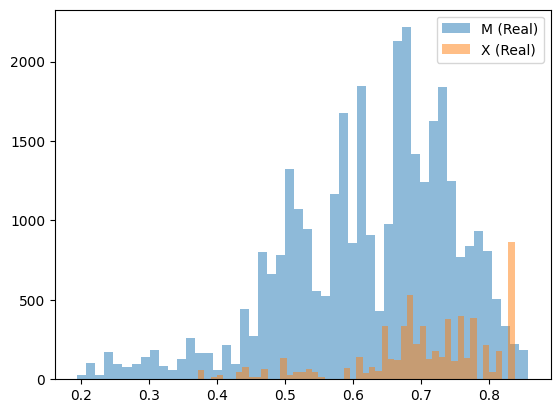

In [11]:
y_proba = final_model.predict_proba(data['x']['test'])[:, 1]
plt.hist(y_proba[data['y']['test']==0], bins=50, alpha=0.5, label='M (Real)')
plt.hist(y_proba[data['y']['test']==1], bins=50, alpha=0.5, label='X (Real)')
plt.legend()
plt.show()

## Threshold Tuning

In [12]:
# fig = final_model.get_threshold_graph(data['x']['test'], data['y']['test'])
# display(fig)

In [20]:
final_model.optimize_threshold(data['x']['test'], data['y']['test'], target_recall=0.95)

Threshold ajustado para Recall ~0.95: 0.4754


np.float32(0.47540948)

## Results

In [21]:
print(final_model.get_classification_report(
    data['x']['test'], data['y']['test'], target_names=['M', 'X']
))

              precision    recall  f1-score   support

           M       0.92      0.11      0.20     33720
           X       0.17      0.95      0.28      6240

    accuracy                           0.24     39960
   macro avg       0.54      0.53      0.24     39960
weighted avg       0.81      0.24      0.21     39960



In [15]:
fig, summary = final_model.analyze_flux_errors(
    data['x']['test'], data['y']['test'],
    flux_values=data['flux']['test'],
    buffer_limits=buffer_limits
)
display(summary)

Outcome,TN (Correct Rejection),FP (False Alarm),FP Rate (%),FN (Miss)
Zone,,,,
0. Global Range (No Buffer),33529,191,0.6,6240


In [16]:
error_report = final_model.analyze_error_distribution(
    x=data['x']['test'],
    y_true=data['y']['test'],
    flux_values=data['flux']['test']
)
display(error_report)

,FN (Miss),FP (False Alarm),FN (Miss) Avg Flux,FP (False Alarm) Avg Flux
SolarClass,,,,
M (1.0 - 9.9),0,191,-,5.20e-05
X (> M10),6240,0,2.65e-04,-


## Features Importance

In [17]:
features_importance = final_model.get_feature_importance()
features_importance

,feature,importance,cumulative_importance
0,xl_std_7D,0.174681,0.174681
12,xl_mean_12h,0.078361,0.253043
1,xl_std_14D,0.063446,0.316489
10,xl_mean_24h,0.054677,0.371165
2,xl_std_24h,0.051015,0.422180
13,xl_ratio_mean24h_mean7d,0.050421,0.472601
4,xl_max_14D,0.048273,0.520874
6,xl_max_7D,0.048122,0.568996
17,xl_max_6h,0.046019,0.615015
3,xl_std_30D,0.045088,0.660103


## Export